<a href="https://colab.research.google.com/github/shipra-saxena/miniature-potato/blob/master/k_means_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import all important Apis

from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
mlp.rc('axes',labelsize=14)
mlp.rc('xtick',labelsize=14)
mlp.rc('ytick',labelsize=14)
import os
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance_matrix
import seaborn as sns

In [0]:
# input data
df=pd.read_csv('snsdata.csv')
df.shape

(30000, 40)

In [0]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
5,2006,F,NaN,142,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
6,2006,F,18.930,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0
7,2006,M,18.322,17,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2006,F,19.055,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2006,F,18.708,39,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,6,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0


In [0]:
#check for missing values
df.columns[df.isnull().any()]

Index(['gender', 'age'], dtype='object')

In [0]:
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [0]:
# since there is no benifit of imputing missing value of gender in our case we can concentrate on  missing value age
df = df.dropna(subset=['gender'])
df.shape

(27276, 40)

In [0]:
#remove unnecessary columns
df = df.drop(['gradyear', 'gender', 'age'], axis=1)

In [0]:
df.shape

(27276, 37)

In [0]:
# Normalize the data using z value function will be given in exam 

def standardization(dataset):
    """ Standardization of numeric fields, where all values will have mean of zero 
    and standard deviation of one. (z-score)
    
    Args:
    dataset: A `Pandas.Dataframe` 
    """
    dtypes = list(zip(dataset.dtypes.index, map(str, dataset.dtypes)))
    #print(dtypes)
    # Normalize numeric columns.
    for column, dtype in dtypes:
        #if dtype == 'float32':
        dataset[column] -= dataset[column].mean()
        dataset[column] /= dataset[column].std()
    return dataset


In [0]:
df = standardization(df)
df.head()

,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.643453,-0.338533,-0.365324,-0.245781,-0.222231,-0.224703,-0.263238,-0.209202,-0.204944,-0.170849,-0.303174,-0.406694,-0.186470,-0.269955,-0.268978,-0.205356,0.482653,-0.270232,-0.143601,-0.628163,-0.342471,-0.350263,-0.30024,-0.192518,-0.10488,-0.388534,-0.250950,-0.05055,-0.373074,-0.495173,-0.318116,-0.201667,-0.184862,-0.304318,-0.264517,-0.223601,-0.177765
1,-0.834445,-0.338533,1.025018,-0.245781,-0.222231,-0.224703,-0.263238,-0.209202,-0.204944,-0.170849,-0.303174,0.826134,-0.186470,-0.269955,-0.268978,-0.205356,-0.367844,-0.270232,-0.143601,1.030880,2.378938,0.387138,-0.30024,-0.192518,-0.10488,4.971932,8.549956,-0.05055,1.053530,-0.495173,-0.318116,-0.201667,-0.184862,-0.304318,-0.264517,-0.223601,-0.177765
2,1.048195,-0.338533,1.025018,-0.245781,-0.222231,-0.224703,-0.263238,-0.209202,-0.204944,-0.170849,-0.303174,-0.406694,-0.186470,-0.269955,-0.268978,-0.205356,-0.367844,1.474347,-0.143601,0.201359,-0.342471,-0.350263,-0.30024,-0.192518,-0.10488,-0.388534,-0.250950,-0.05055,-0.373074,-0.495173,-0.318116,-0.201667,-0.184862,-0.304318,1.965769,-0.223601,-0.177765
3,-0.834445,-0.338533,-0.365324,-0.245781,-0.222231,-0.224703,-0.263238,-0.209202,-0.204944,-0.170849,-0.303174,0.826134,-0.186470,-0.269955,-0.268978,-0.205356,-0.367844,-0.270232,-0.143601,-0.628163,1.018233,-0.350263,-0.30024,-0.192518,-0.10488,-0.388534,-0.250950,-0.05055,-0.373074,-0.495173,-0.318116,-0.201667,-0.184862,-0.304318,-0.264517,-0.223601,-0.177765
5,3.039972,-0.338533,-0.365324,-0.245781,-0.222231,-0.224703,-0.263238,-0.209202,-0.204944,-0.170849,-0.303174,-0.406694,0.675592,-0.269955,-0.268978,-0.205356,-0.367844,-0.270232,3.256459,1.030880,-0.342471,-0.350263,-0.30024,-0.192518,-0.10488,-0.388534,1.949277,-0.05055,-0.373074,0.869380,-0.318116,-0.201667,-0.184862,-0.304318,-0.264517,2.244607,-0.177765


In [0]:
# Test cluster tendency analysis 
def hopkins(x, n):
    """Hopkins Statistic
       Measures the cluster tendency of a data set.  Returns the statistic value.

       Parameters
       ----------
       x : array-like or sparse matrix, shape (n_samples, n_features). The data set

       n : int, number of points to sample randomly from the data set

    """

    d = len(x)
    columns = x.shape[1]

    for i in range(columns):
        if np.max(x[:, i]) == np.min(x[:, i]) == 0:
            pass
        else:
            x[:, i] = (x[:, i] - np.min(x[:, i])) / (np.max(x[:, i]) - np.min(x[:, i]))

    s = np.random.choice(d, n, replace=False)
    nns = NearestNeighbors(n_neighbors=1).fit(x)

    u, w = 0, 0
    for i in s:
        ran_point = [np.random.uniform(size=columns)]
        u += nns.kneighbors(ran_point)[0][0][0]
        w += nns.kneighbors([x[i]], 2)[0][0][1]

    return u / (u + w)

In [0]:
df_npy = df.to_numpy(copy=True)
hs = hopkins(df_npy, df_npy.shape[0])

# print Hopkins statistic
print(hs)

0.9751089524707751


In [0]:
#fit model
km=KMeans(n_clusters=5,random_state=5,init='k-means++',n_init=10)
y_pred = km.fit_predict(df)
y_pred

array([3, 2, 3, ..., 3, 3, 3], dtype=int32)

In [0]:
test = df.iloc[1:5,:]
km.predict(test)

array([2, 3, 3, 3], dtype=int32)

In [0]:
labels = km.fit_predict(df)

In [0]:
#cluster visualisation using pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(df)

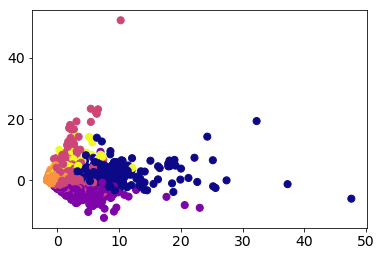

In [0]:
plt.scatter(pcs[:, 0], pcs[:, 1], c=labels,
            s=50, cmap='plasma');

In [0]:
#evaluate the performance of kmeans using inertia i.e the sum of the squared distances 
#between each training instance and its closest centroid:
km.inertia_

884388.8012718488

In [0]:
#for better clustering we can optimize kmeans 
#that include optimum no. of clusters[elbow method ,silhout]
#init value
#n_init

In [0]:
#find optimum k
#find optimal no. of k
Sum_of_squared_distances = []
K = range(3,8)
for k in K:
    km = KMeans(n_clusters=k,random_state=32)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

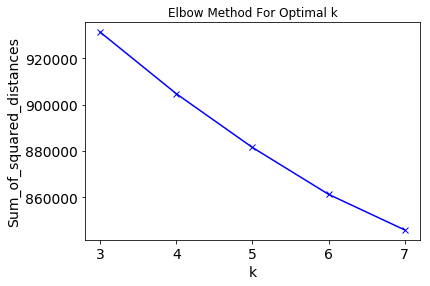

In [0]:
#not working 
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()